In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
import os 
path = ('/Users/gabriel/Downloads')
os.chdir(path)

In [4]:
pwd

'/Users/gabriel/Downloads'

In [5]:
data = pd.read_csv('StudentsPerformance.csv')
data.describe(include = 'all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [6]:
data.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
students = data['gender'].count()
for i in range (0,students):
    students.append(i)

students_arr = np.array(students)
print(students_arr.shape[0])

#Easier to way to obtain the same as above
#count = (len(data['gender']))
#count2 = np.arange(0,count)

AttributeError: 'numpy.int64' object has no attribute 'append'

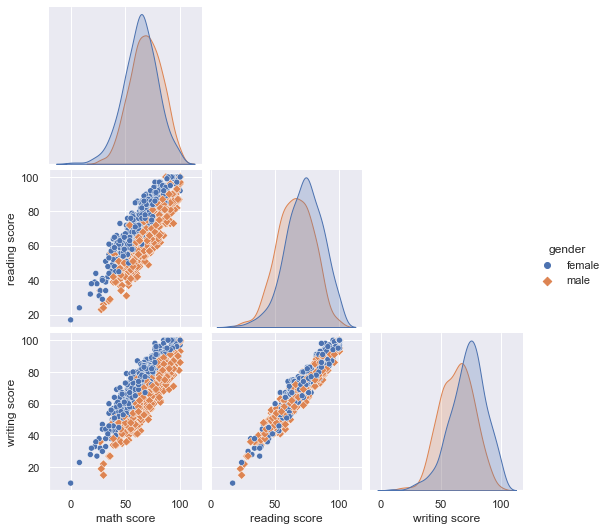

In [13]:
sns.pairplot(data, hue = 'gender',kind = "scatter",corner = True, markers = ['o','D'])
plt.show()

There is high correlation in the marks of the three tests, particularly in the reading and writing score

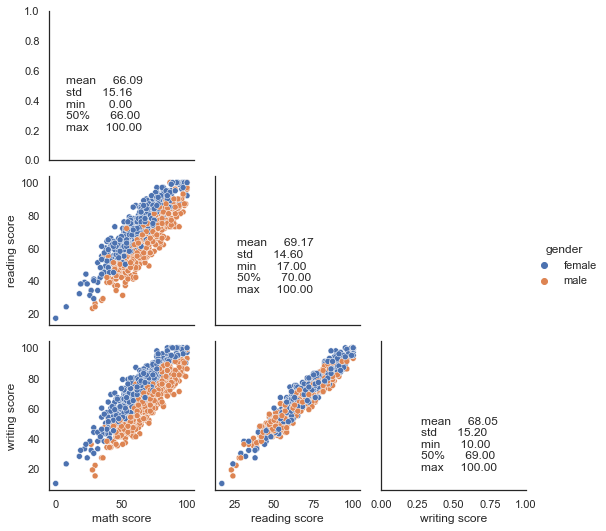

In [15]:
pgrid = sns.PairGrid(data, hue = 'gender', corner = True)
pgrid = pgrid.map_offdiag(sns.scatterplot)
(plt.figtext(0.12,0.75, 
data['math score'].describe().round(2).loc[['mean','std','min','50%','max']].to_string()))
(plt.figtext(0.4,0.45,
data['reading score'].describe().round(2).loc[['mean','std','min','50%','max']].to_string()))
(plt.figtext(0.7,0.12,
data['writing score'].describe().round(2).loc[['mean','std','min','50%','max']].to_string()))
pgrid = pgrid.add_legend()

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


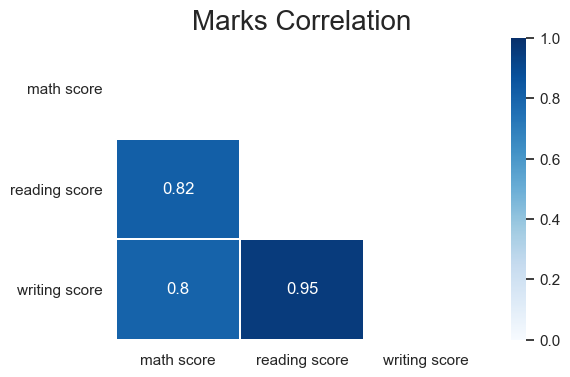

In [14]:
correlation = data.corr()#Compute pairwise correlation of columns
mask = np.triu(np.ones_like(correlation,dtype = bool))
#mask = np.triu(np.zeros_like(correlation))
#mask[np.triu_indices_from(mask)] = True
sns.set_style(style = 'white')

plt.figure(edgecolor = 'black',dpi = 100) #figure resolution
sns.heatmap(correlation, mask = mask, vmin = 0,vmax = 1,annot = True,lw = 1, linecolor = 'white',cmap = 'Blues')
plt.title('Marks Correlation',fontsize = 20)
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
print(correlation)

In [ ]:
#Map data where male is 0 and female is 1
data_mapped = data.copy()
data_mapped['gender'] = data_mapped['gender'].map({'male':0,'female':1})
#data_mapped

In [ ]:
data_mapped_2 = data_mapped.iloc[:,0:1]
#data_mapped_2.head(5)

## Marks Average

In [ ]:
#Average marks
mean_marks_math= np.mean(data['math score'])
mean_marks_reading= np.mean(data['reading score'])
mean_marks_writing= np.mean(data['writing score'])
print('Maths mean:',mean_marks_math,
      'Reading mean:',mean_marks_reading,
      'Writing mean:', mean_marks_writing)


In [ ]:
average = ((data['math score']+data['writing score']+data['reading score'])/3).round(2)
print(average)

In [ ]:
data_mapped_2['gender'].value_counts()#Return a Series containing counts of unique values.

We have 518 Females and 482 males.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
ols = LinearRegression().fit()
